In [697]:
from pylab import *
import random


# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

*Gruppe: Tobias Blümlhuber, Silvan Kron, Simon Gärtner*

# Kleines Projekt 1: Zellulärer Automat
## Simulierung eines Waldbrandes 

Ein mögliches modell zur Simulation von Waldbränden basiert auf der Unterteilung einer Fläche in Zellen. Jeder der Zellen kann 3 Zustände annehmen: Baum, Feuer, leer. Nach bestimmten Update-Regeln verändert sie die Zellbelegung in jedem Zeitschritt. Ein solches modell nennt man zellulären Automaten.

Für einen solchen zellulären Automaten gilt:

- das untersuchte Gebiet wird in Zellen unterteil (zellulär)
- die Zellen können bestimmte Zustände annehmen (Zustand)
- die Zustände ändern sich nach gewissen Regeln pro Zeitschritt (Automat)

Zelluläre Automaten finden in vielen Simulationsbereichen Anwendung z.B. auch in der Verkehrssimulation.

**Updateregeln:**

Die Schlagkraft eines solchen Automaten steckt in den Updateregeln. Zunächst wird eine Anfangskonfiguration gesetzt, z.B. indem das Gebiet mit einer vom Anwender gegebenen Besetzungsdichte $b$ zufällig mit Bäumen bepflanzt wird.

Für jede Zelle wird während der Simulation in jedem Zeitschritt der Zustand nach dem folgenden Regeln neu bestimmt:

1. Ist eine Zelle leer, bleibt sie im nächsten Zeitschritt leer.
2. Falls sich in den 4 Nachbarzellen eines Baumes mindestens ein brennender Baum befindet, fängt der Baum mit der Wahrscheinlichkeit $p_e$ Feuer. Ein brennender Baum brennt innerhalb eines Zeitschrittes herunter, im nächsten Zeitschritt ist die Zelle auf jeden Fall leer.

**Aufgaben:**

1. Schreiben Sie ein SageMath-Programm, dass das obige einfache Waldbrandmodell umsetzt und grafisch darstellt. Die Gittergröße soll variabel sein.
2. Testen Sie anhand der Wahrscheinlichkeiten $p_e \in \{0.2, 0.5, 0.8\}$, wie sich das Feuer ausbreitet.
3. Implementieren Sie eine Statistikfunktion, die (z.B. für ein 20 x 20 Gitter) den Anteil des abgebrannten Waldes nach n Zeitschritten in Abhängigkeit von $p_e$ experimentell ermittelt (jeweils für 5 verschiedene Initialisierungen).
 -  Plotten Sie den Anteil des abgebrannten Waldes in Abhängigkeit von der Zeit.
 -  Stellen Sie den Anteil des abgebrannten Waldes in Abhängigkeit $p_e$ nach 10 Zeitschritten als Plot dar.
4. Wie behandeln Sie den Rand des Gebietes? Implementieren Sie einen weitere Möglichkeit und vergleichen Sie die Ergebnisse.
5. Nun soll noch die Möglichkeit eines Blitzeinschlages in einem baum mit der Wahrscheinlichkeit $p_b$ in das Modell aufgenommen werden. Vergleichen Sie mit Ihren bisherigen Ergebnissen.
6. Implementieren Sie *mindestens eine* der folgenden Modellerweiterungen und vergleichen Sie experimentell mit Ihren bisherigen Ergebnissen. Versuchen Sie Schlussfolgerungen zu finden:
  -  Ein Baum benötigt zum Abbrennen 2 Zeitschritte.
  -  Die Wahrscheinlichkeit es Baumes, Feuer zu fangen, steigt mit der Anzahl der brennenden Bäume in der Umgebung.
  - In einer leeren Zelle wächst mit der Wahrscheinlichkeit $p_n$ ein neuer Baum. 
  - Die Größe eines Baumes ändert sich von Zeitschritt zu Zeitschritt, ein großer Baum benötigt mehr Zeit zum Abbrennen.
  -  Berücksichtigen Sie Wind-Richtung (N, O, S, W) und -Geschwindigkeit (klein, mittel, hoch)

**Arbeitsschritt 1:**

In diesem Code Abschnitt werden die verschiedensten Parameter für den Zellulären Automaten definiert. Angefangen mit der Größe des Gitternetzes (`number_of_columns` und `number_of_rows`) und der Dichte der Bäume (`density` in Prozent, z.B. 80% = 0.80). Ebenso werden Listen erstellt die Felder in Kategorien einordnen (`forest_fields`,`fire_fields`,`free_fields`). Der Parameter `pe` verdeutlicht dabei die Wahrscheinlichkeit, dass ein benachbarter Baum Feuer fängt.

Anschließend wird eine Matrix erstellt, die der Größe des Gitternetzes (`forest`) entspricht. Die Matrix wird vorerst nur mit Nullen befüllt. Ebenso wird die Liste mit freien Feldern befüllt.

In [698]:
# define parameters

number_of_columns = 20
number_of_rows = 20
density = 0.8
pe = 0.5
pb = 0
pw = 0

# define lists for each category
forest_fields = []
fire_fields = []
free_fields = []


# create forest matrix
forest = random_matrix(ZZ, nrows = number_of_rows, ncols = number_of_columns, x = 1)

# fill list with free fields with all possible values
for col in range(0, number_of_columns):
    for row in range(0, number_of_rows):
        free_fields.append((row, col))

**Arbeitsschritt 2: Erstellen von Methoden**

Diese Methode `printMatrix()` dient dazu die Matrix in einer Farbskalierung auszugeben und grafisch darzustellen. Dabei gibt es folgendes Farbmuster:
- leeres Feld: weiß
- Feld mit Bäumen: grün
- brennendes Feld: rot

In [699]:
def printMatrix(forest):
    cpool = ['#FF0000', '#FFFFFF', '#006400' ]

    cmap3 = matplotlib.colors.ListedColormap(cpool[0:3])

    return matrix_plot(forest, cmap = cmap3, colorbar = True, vmin = -1, vmax = 1)

Die Methode `createTree()` wird dazu benötigt, um an den übergebenen Koordinaten einem Baum zu erstellen.

In [700]:
def createTree(coordinates, forest, forest_fields, free_fields):
    forest[coordinates[0], coordinates[1]] = 1
    forest_fields.append(coordinates)
    free_fields.remove(coordinates)

Die Methode `createFire()` wird dazu benötigt, um an den übergebenen Koordinaten ein Feuer zu zünden.

In [701]:
def createFire(coordinates, forest, forest_fields, fire_fields):
    forest[coordinates[0], coordinates[1]] = -1
    forest_fields.remove(coordinates)
    fire_fields.append(coordinates)

Die Methode `createEmptyField()` wird dazu benötigt, um an den übergebenen Koordinaten ein leeres Feld erstellen.

In [702]:
def createEmptyField(coordinates, forest, free_fields):
    forest[coordinates[0], coordinates[1]] = 0
    free_fields.append(coordinates)

Die Methode `createTrees()` wird dazu benötigt um das Gitternetz zufällig zum ersten Mal mit Bäumen zu befüllen. Die Anzahl der Bäume richtet sich dabei nach dem in `density` festgelegten Prozentwert. 

Zuerst wird hierfür die Anzahl der Bäume errechnet (`number_of_trees`). 

Anschließend werden solange zufällig Koordinaten erzeugt bis alle Bäume eingefügt worden sind. Dabei wird auch beachtet, dass ein Baum nicht zweimal auf dem gleichen Feld stehen kann.

Ebenso wird auch die zugrundeliegende Matrix angepasst.

In [703]:
def createTrees(density, free_fields, forest_fields, number_of_cols, number_of_rows, forest):
    
    number_of_trees = number_of_cols * number_of_rows * density
    
    while (number_of_trees > 0):
        col_index = random.randint(0, number_of_cols - 1)
        row_index = random.randint(0, number_of_rows - 1)

        coordinates = (row_index, col_index)

        if coordinates not in forest_fields:
            createTree(coordinates, forest, forest_fields, free_fields)
            number_of_trees -= 1
    

Die Methode `createInitialFire()` erstellt das erste Feuer. Dieses wird zufällig aus den Feldern mit Bäumen ausgewählt und entzündet.

In [704]:
def createInitialFire(forest_fields, fire_fields, forest):
    index = random.randint(0, len(forest_fields)-1)
    
    coordinates = forest_fields[index]
    
    createFire(coordinates, forest, forest_fields, fire_fields)

Folgende Methode `spreadFire()` berechnet die Ausbreitung des Feuers und steuert diese. Dafür werden zuerst die 4 Nachbarfelder des Feuers berechnet. Anschließend wird geschaut, ob auf diesem ein Baum steht. Wenn nein, dann passiert nichts, wenn doch, dann wird dieser Baum mit der übermittelten Wahrscheinlichkeit `pe` angezündet.

**Arbeitsschritt 4**

Wenn `oneSystem` true ist, dann wird eine andere Behandlung der Randfelder vorgenommen. Diese erfolgt dann nach einem geschlossenen System, das bedeutet, dass ein Baum am oberen Rand einen Baum am unteren Rand in der gleichen Spalte entzünden kann. Das gleiche gilt auch für den linken und rechten Rand. Wenn `oneSystem` false ist, dann werden die Ränder normal behandelt.

**Arbeitsschritt 5**

`duration` bestimmt wie lange ein Baum brennen soll. Wenn er z.B. für zwei Zeiteinheiten brennen soll, dann muss man hier 2 übergeben, wenn nur für eine dann eine 1.

In [705]:
def spreadFire(forest_fields, fire_fields, free_fields, pe, forest, oneSystem, amount_of_cols, amount_of_rows, duration, current_time):
    
    temp = fire_fields.copy()
    
    if current_time % duration == 0:
        fire_fields.clear()
    
    possible_fire_fields = []
    
    for fire in temp:
        
        # get fields around fire field
        top_field = (fire[0]-1, fire[1])
        bottom_field = (fire[0]+1, fire[1])
        right_field = (fire[0], fire[1]+1)
        left_field = (fire[0], fire[1]-1)      
        
        if oneSystem:
            if left_field[1] < 0:
                left_field = (left_field[0], amount_of_cols-1)
         
            if right_field[1] == amount_of_cols:
                right_field = (right_field[0], 0)
                
            if top_field[0] < 0:
                top_field = (amount_of_rows-1, top_field[1])
            
            if bottom_field[0] == amount_of_rows:
                bottom_field = (0, bottom_field[1])
              
        if left_field in forest_fields and left_field not in possible_fire_fields:
            possible_fire_fields.append(left_field)
        
        if right_field in forest_fields and right_field not in possible_fire_fields:
            possible_fire_fields.append(right_field)
            
        if top_field in forest_fields and top_field not in possible_fire_fields:
            possible_fire_fields.append(top_field)
        
        if bottom_field in forest_fields and bottom_field not in possible_fire_fields:
            possible_fire_fields.append(bottom_field)
        
        if current_time % duration == 0:
            createEmptyField(fire, forest, free_fields)
    
    number_of_new_fires = len(possible_fire_fields) * pe
    
    while(number_of_new_fires > 0):
        index = random.randint(0, len(possible_fire_fields)-1)
        
        new_fire = possible_fire_fields[index]
        
        createFire(new_fire, forest, forest_fields, fire_fields)
        possible_fire_fields.remove(new_fire)
        
        number_of_new_fires -= 1
        
    possible_fire_fields.clear()


Die Methode `createLightningFire()` entzündet mit der Wahrscheinlichkeit `pb` einen Baum durch einen Blitz

In [706]:
def createLightningFire(forest_fields, fire_fields, free_fields, pb):
    number_lightning_strikes = len(forest_fields) * pb
    
    while(number_lightning_strikes > 0):
        index = random.randint(0, len(forest_fields)-1)
        
        new_fire = forest_fields[index]
        
        createFire(new_fire, forest, forest_fields, fire_fields)
        number_lightning_strikes -= 1

**Arbeitsschritt 5**

Die Methode `growTree` lässt mit einer gewählten Wahrscheinlichkeit Bäume auf leeren Feldern wachsen

In [707]:
def growTree(pw, free_fields, forest_fields, forest):
    
    number_of_trees = len(free_fields) * pw
    
    while(number_of_trees > 0):
        index = random.randint(0, len(free_fields)-1)
        coordinates = free_fields[index]
    
        createTree(coordinates, forest, forest_fields, free_fields)
        number_of_trees -= 1

**MAIN PROGRAMM**

Dieser Codeblock dient dazu, dass Programm einmal durchlaufen zulassen und jeweils nach jedem Zeitschritt sich den entsprechenden Status des Waldes anzuschauen. 

Start scene:


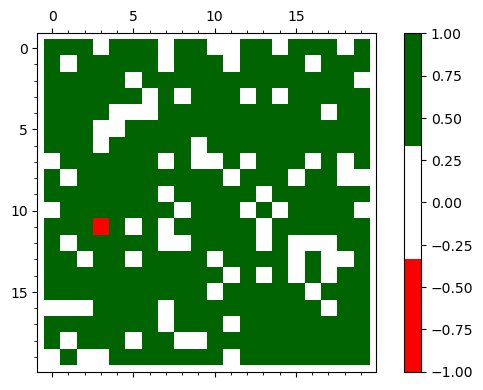

Current time: 1


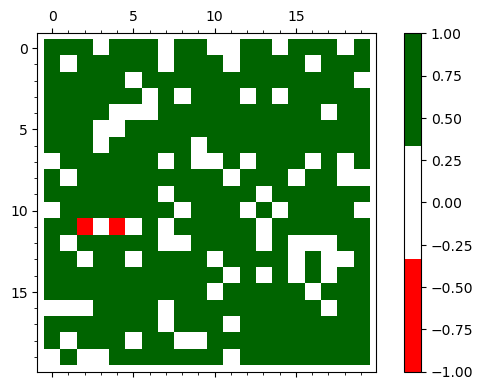

Current time: 2


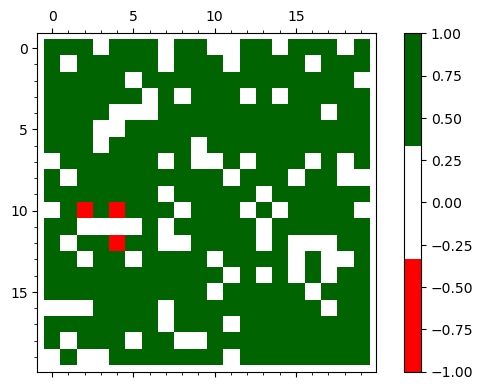

Current time: 3


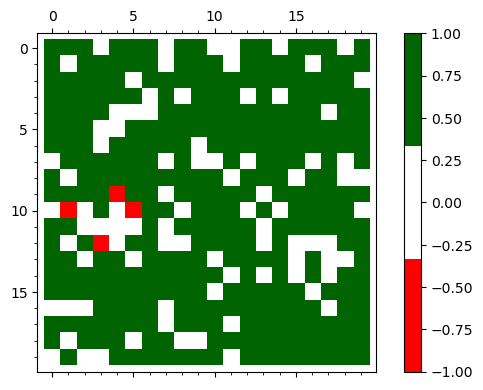

Current time: 4


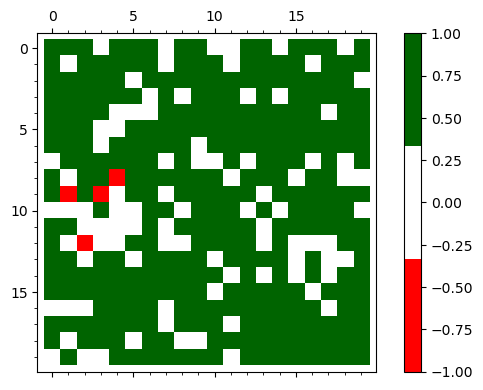

Current time: 5


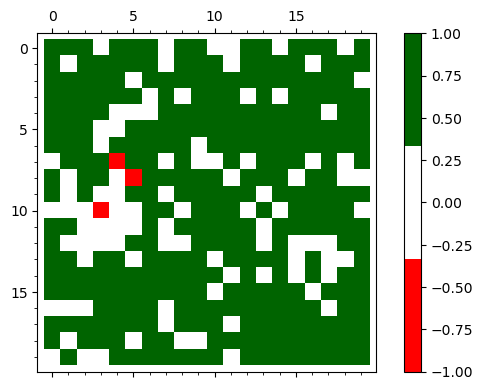

Current time: 6


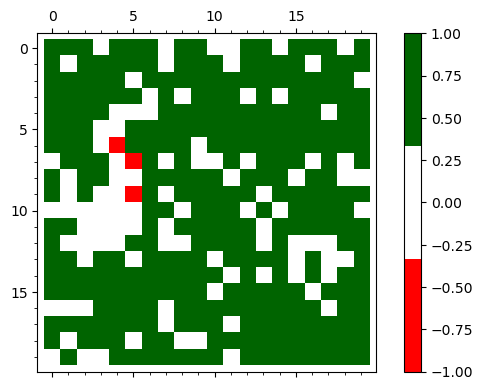

Current time: 7


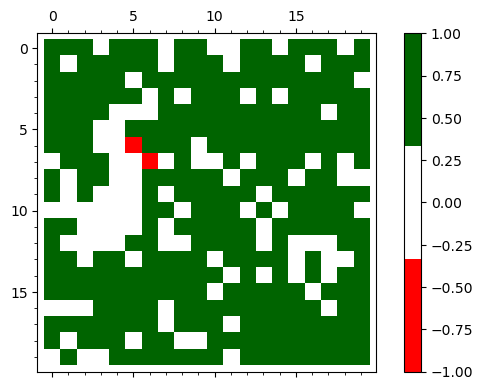

Current time: 8


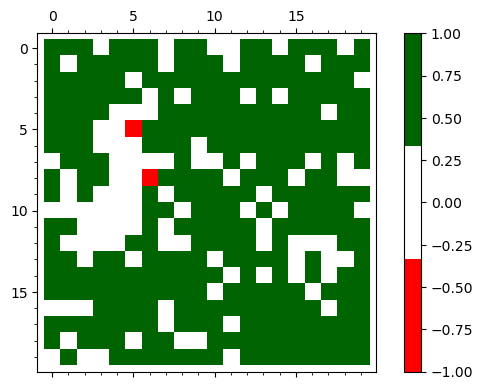

Current time: 9


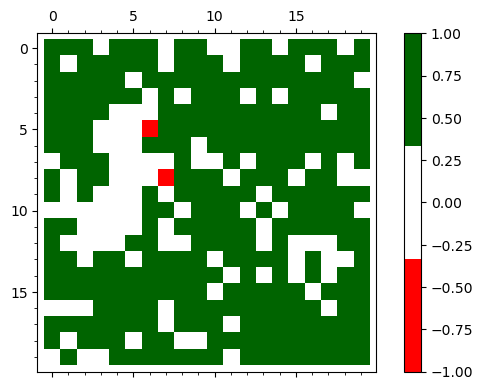

Current time: 10


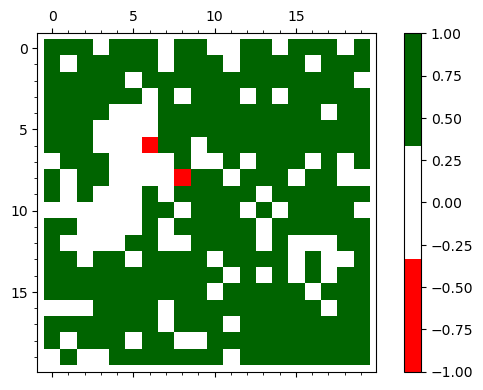

Current time: 11


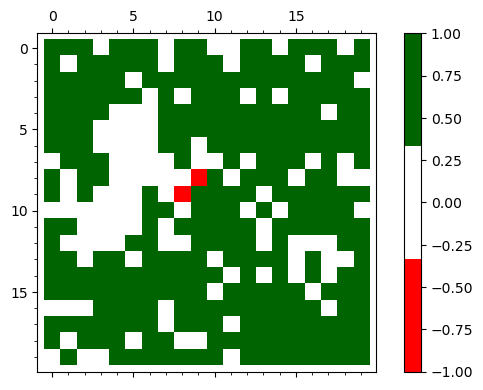

Current time: 12


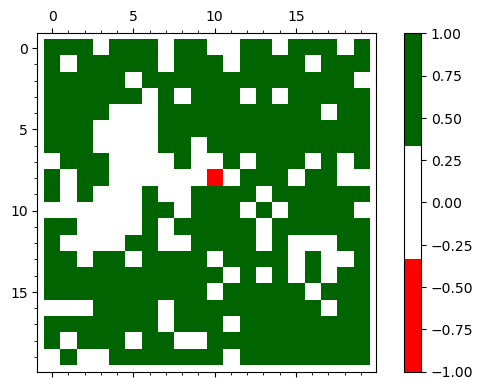

Current time: 13


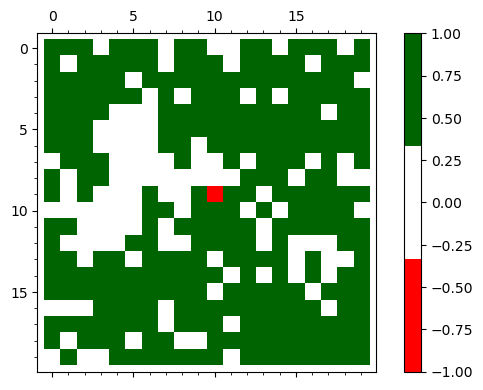

Current time: 14


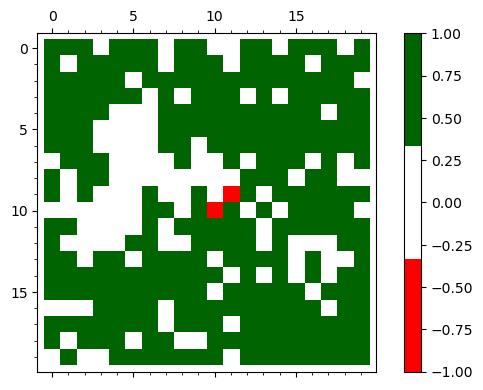

Current time: 15


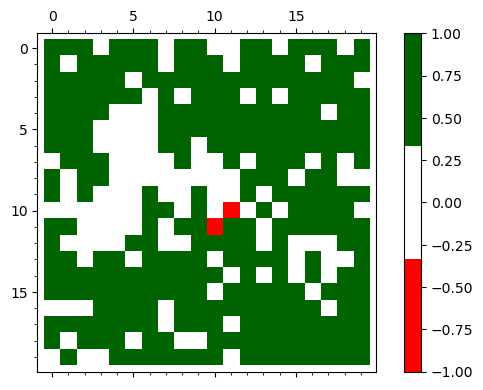

Current time: 16


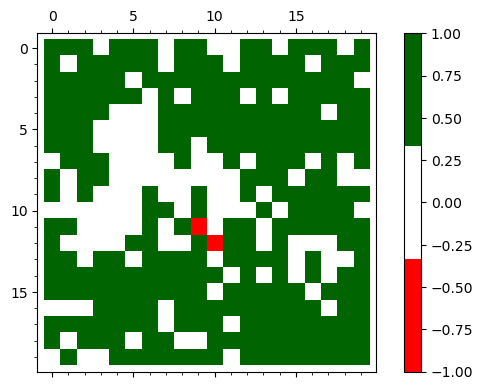

Current time: 17


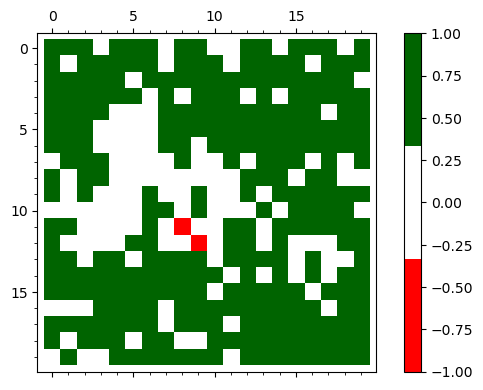

Current time: 18


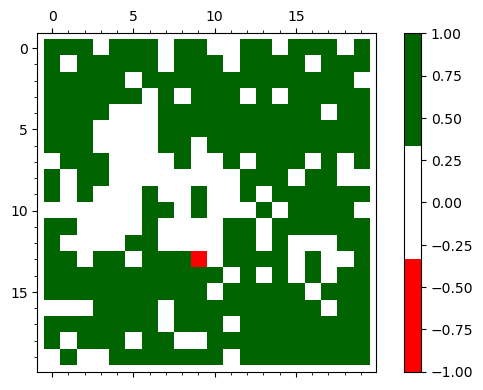

Current time: 19


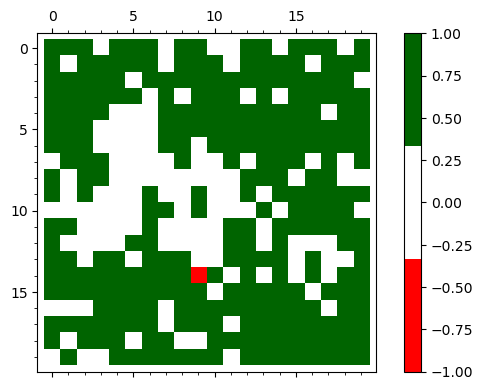

Current time: 20


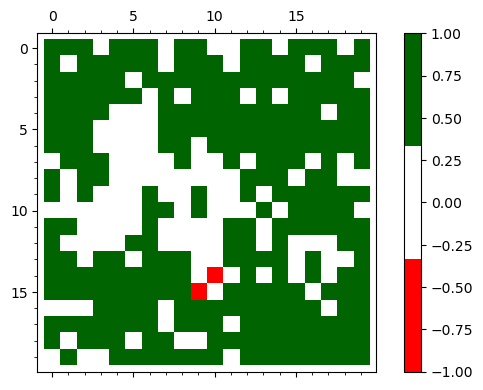

Current time: 21


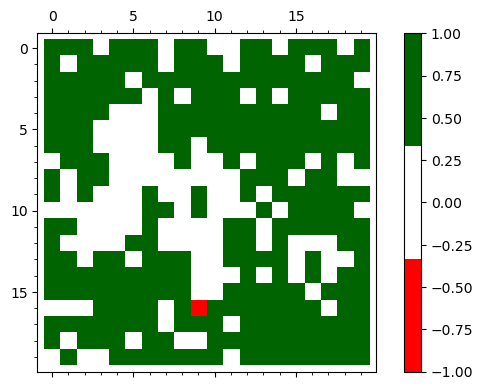

Current time: 22


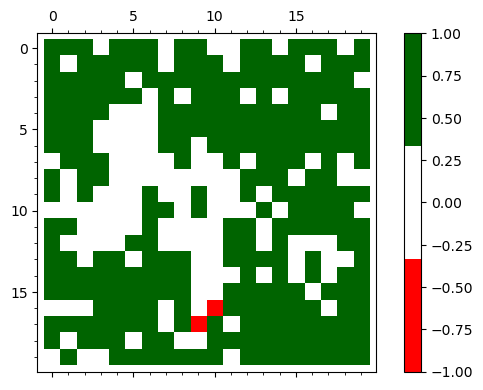

Current time: 23


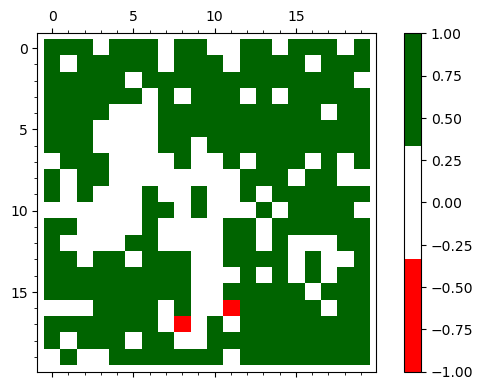

Current time: 24


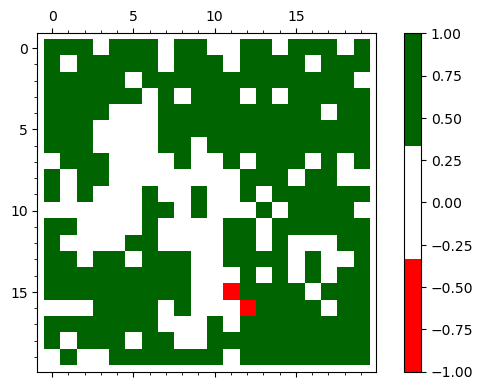

Current time: 25


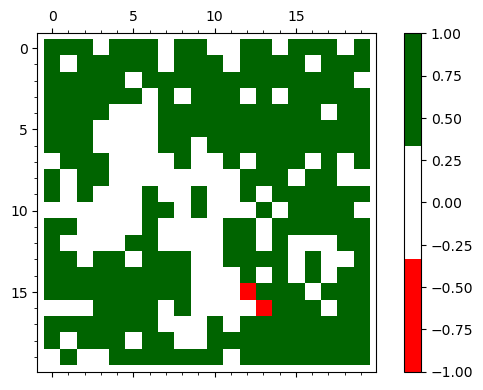

Current time: 26


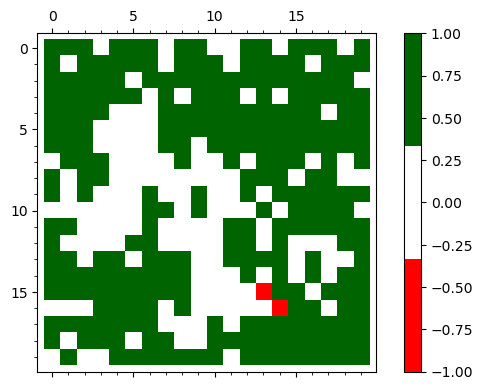

Current time: 27


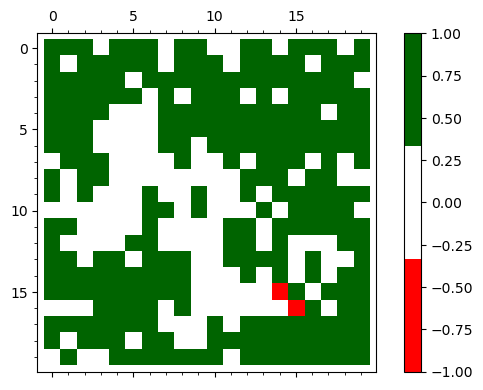

Current time: 28


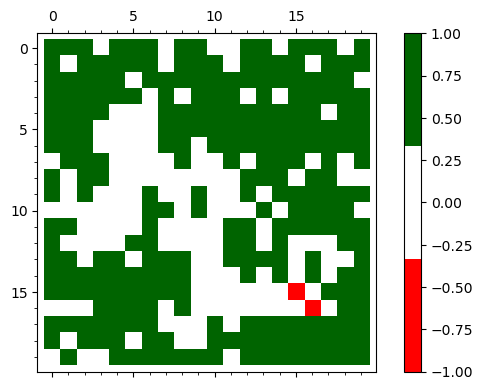

Current time: 29


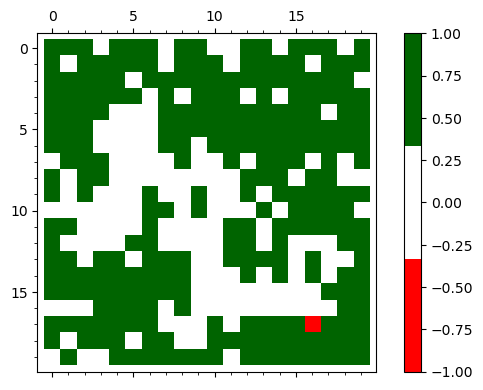

Current time: 30


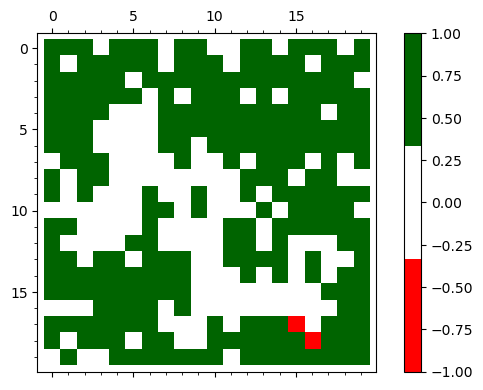

Current time: 31


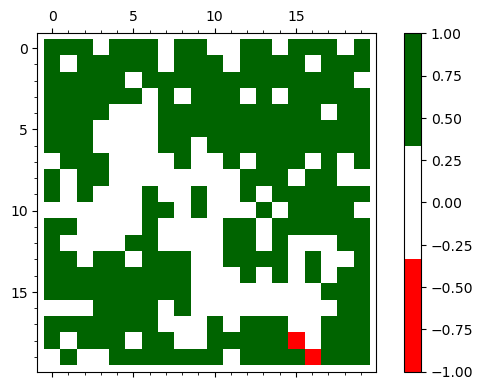

Current time: 32


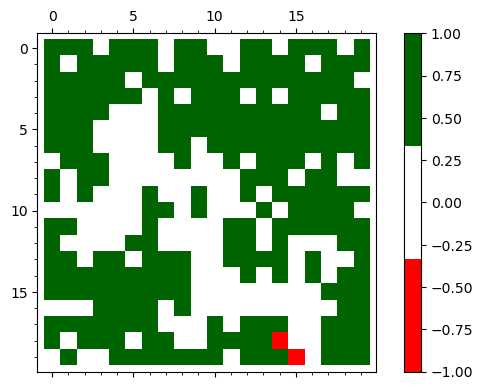

Current time: 33


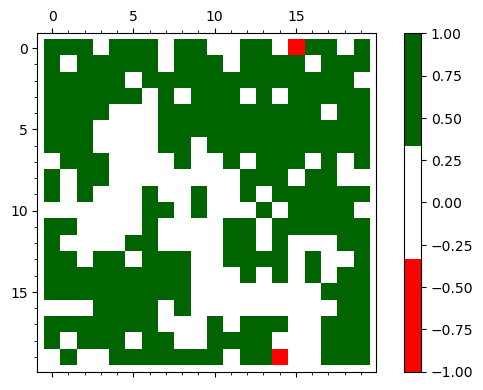

Current time: 34


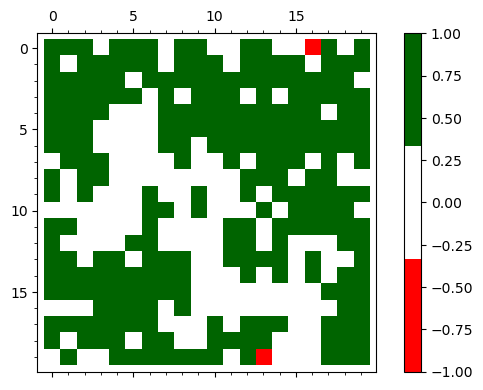

Current time: 35


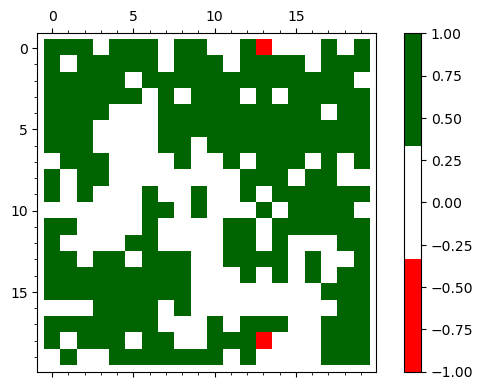

Current time: 36


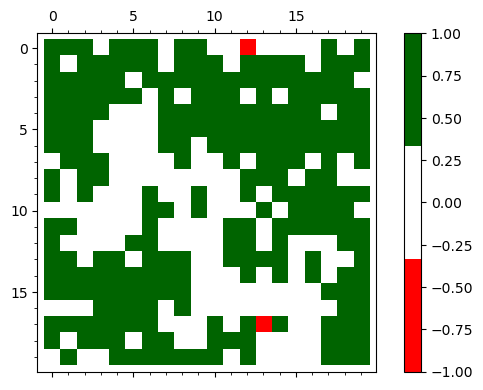

Current time: 37


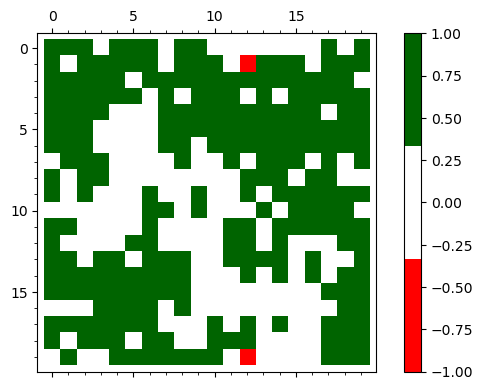

Current time: 38


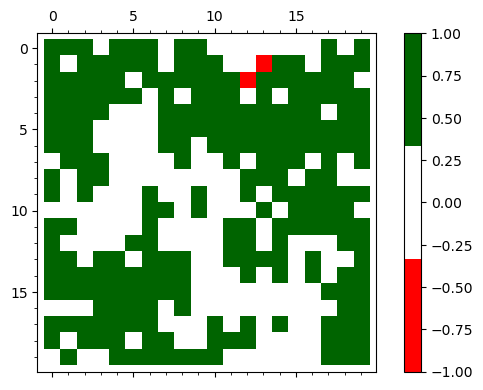

Current time: 39


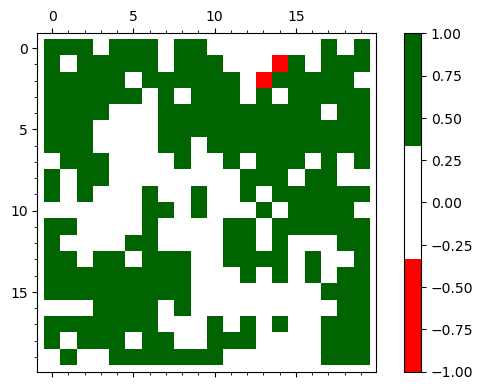

Current time: 40


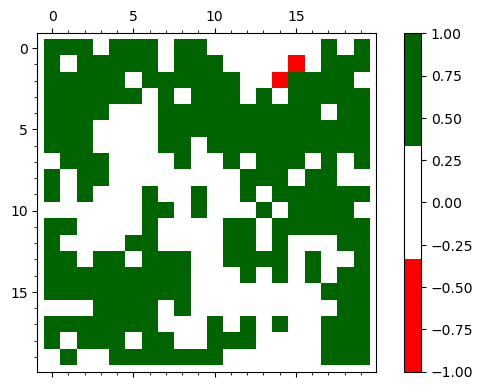

Current time: 41


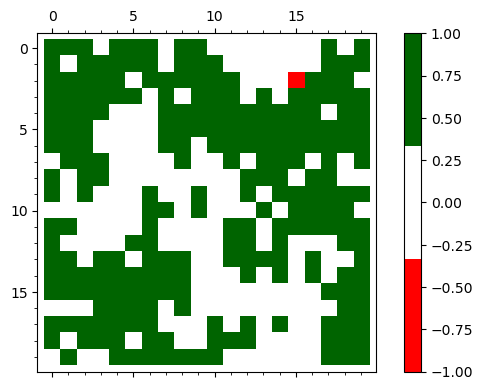

Current time: 42


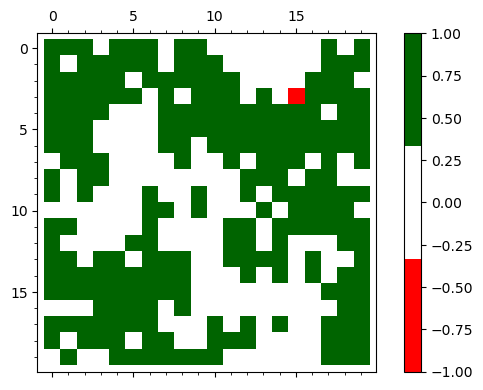

Current time: 43


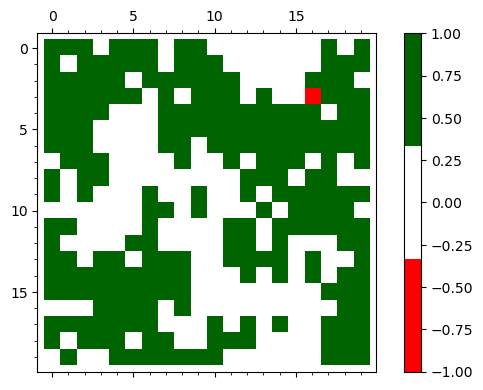

Current time: 44


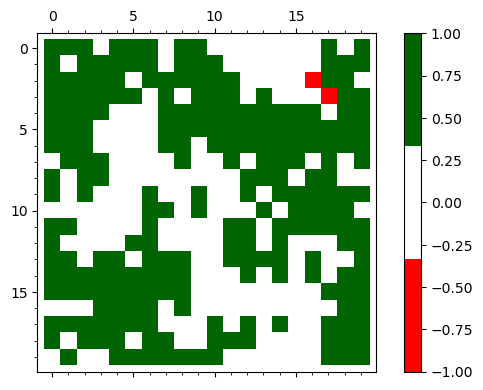

Current time: 45


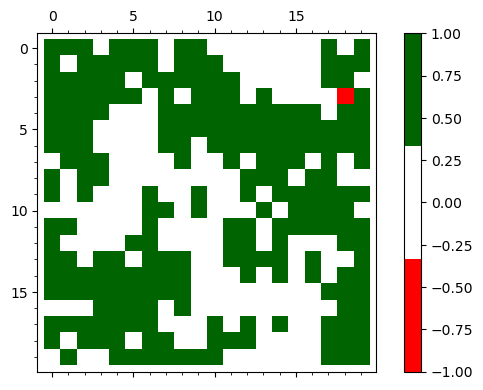

Current time: 46


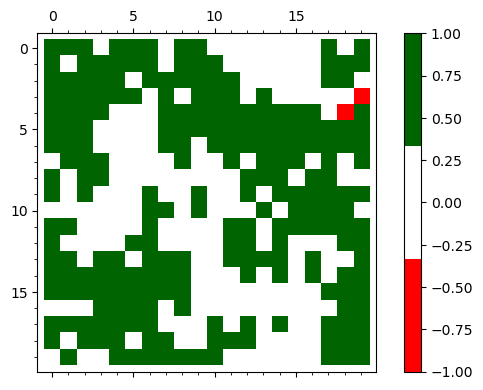

Current time: 47


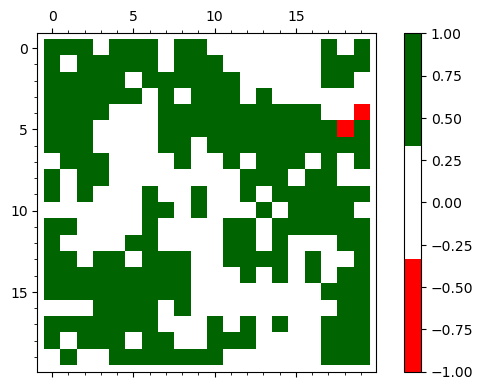

Current time: 48


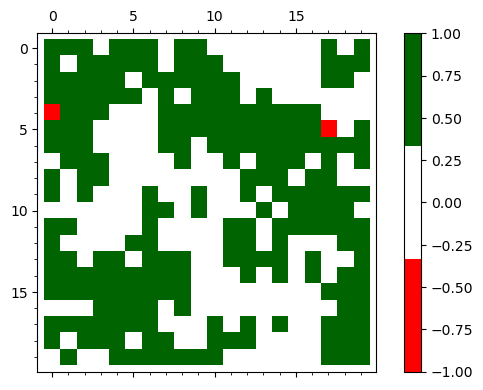

Current time: 49


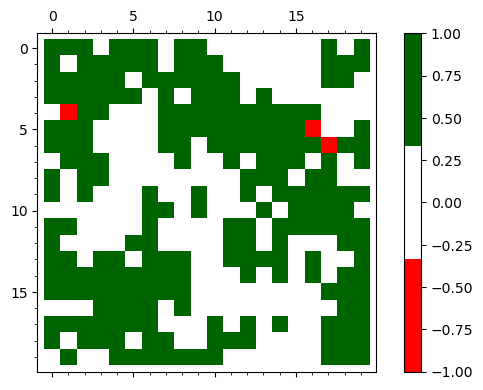

Current time: 50


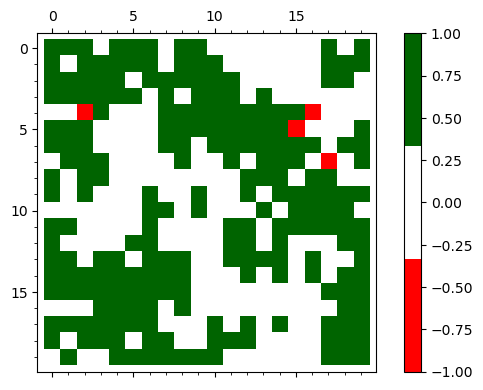

Current time: 51


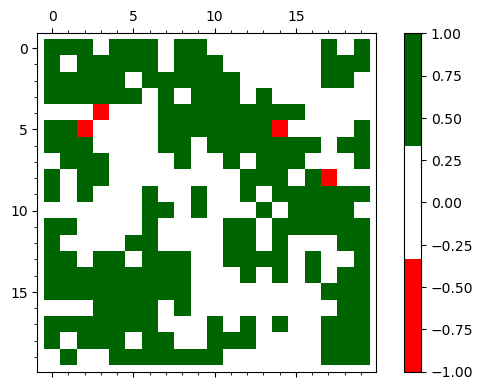

Current time: 52


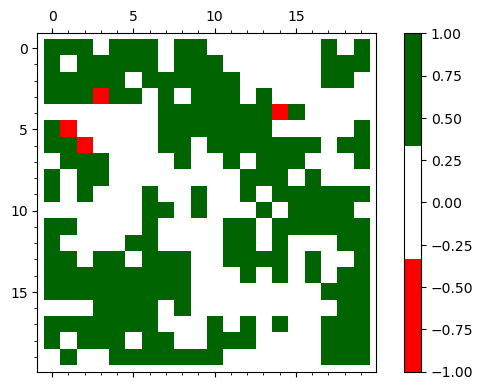

Current time: 53


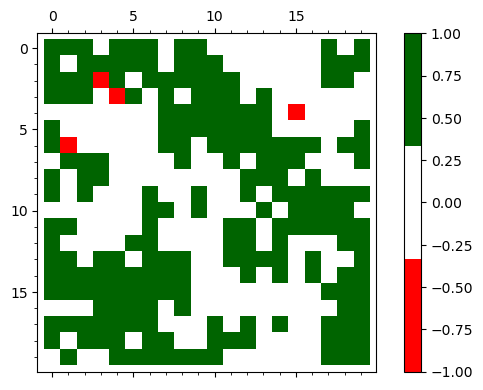

Current time: 54


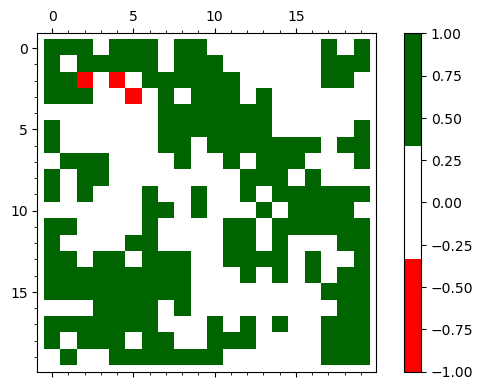

Current time: 55


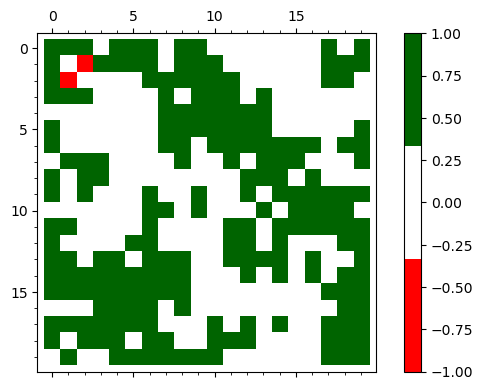

Current time: 56


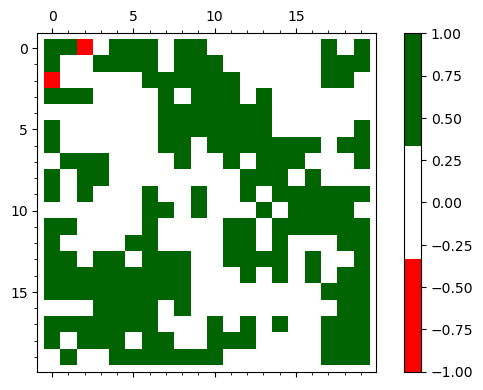

Current time: 57


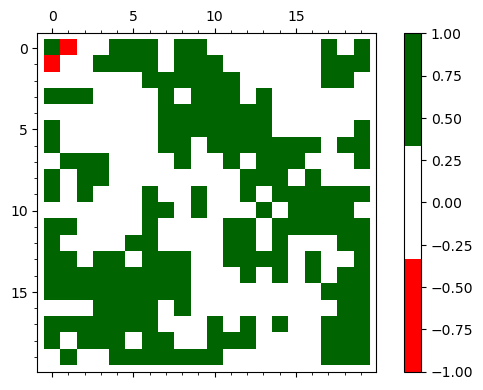

Current time: 58


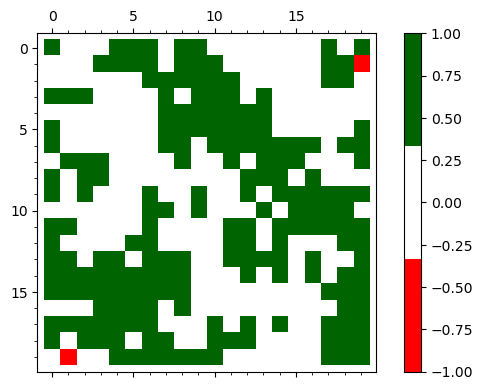

Current time: 59


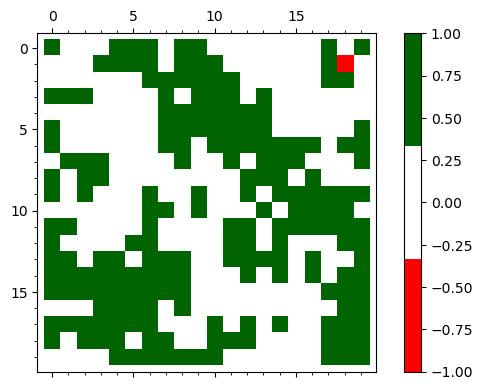

Current time: 60


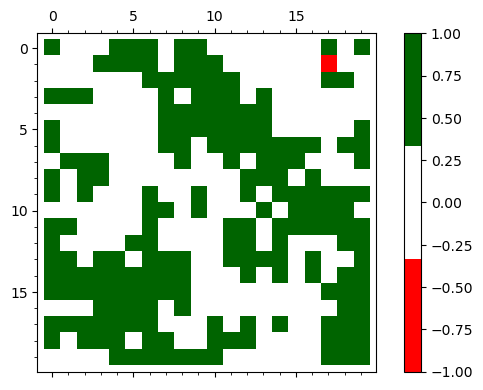

Current time: 61


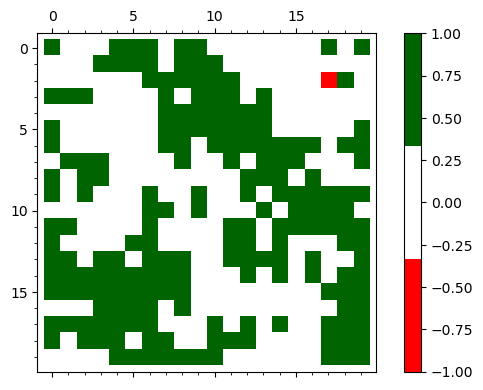

Current time: 62


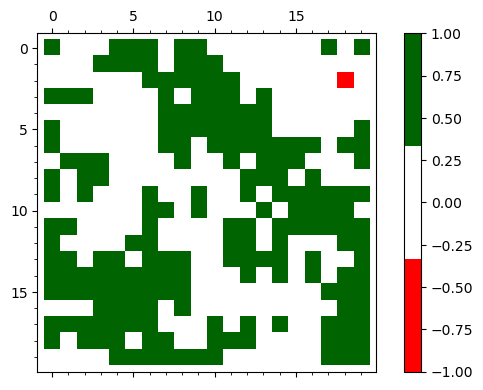

Current time: 63


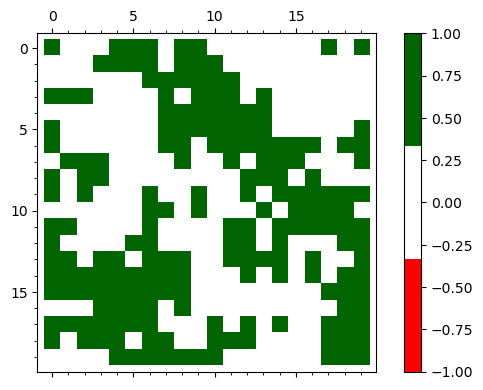

In [708]:
current_time = 1

createTrees(density, free_fields, forest_fields, number_of_columns, number_of_rows, forest)
createInitialFire(forest_fields, fire_fields, forest)

print('Start scene:')
printMatrix(forest)

while(len(forest_fields) != 0 and len(fire_fields) != 0 and current_time < 100):

    print('Current time: ' + str(current_time))

    spreadFire(forest_fields, fire_fields, free_fields, pe, forest, True, number_of_columns, number_of_rows, 1, current_time)
    createLightningFire(forest_fields, fire_fields, free_fields, pb)
    growTree(pw, free_fields, forest_fields, forest)
    
    printMatrix(forest)

    current_time += 1

**Aufgabenstellung 3**
Analyse von verschiedenen Wahrscheinlichkeiten der Entzündlichkeit. 

`setupForAnalytics()` erstellt ein neues Setup für den Wald. Hierbei werden alle Eigenschaften zurückgesetzt und neu generiert.

In [709]:
def setupForAnalytics():

    # define lists for each category
    forest_fields.clear()
    fire_fields.clear()
    free_fields.clear()


    # create forest matrix
    forest = random_matrix(ZZ, nrows = number_of_rows, ncols = number_of_columns, x = 1)
    
    # fill list with free fields with all possible values
    for col in range(0, number_of_columns):
        for row in range(0, number_of_rows):
            free_fields.append((row, col))
    
    createTrees(density, free_fields, forest_fields, number_of_columns, number_of_rows, forest)
    createInitialFire(forest_fields, fire_fields, forest)

`runAnalytics()` lässt die Simulation über ein Setup laufen. Hierbei wird das grundlegende Setup verändert, daher ist es wichtig beim Aufruf dieser Methode nur Kopien der Listen und der Matrix zu übergeben. Somit ist sichergestellt, dass mehrere Analysevorgänge mit dem identischen Setup laufen können.

In [710]:
def runAnalytics(pe, pb, pw, forest_fields, fire_fields, free_fields, forest, number_of_columns, number_of_rows, oneSystem, duration):
    current_time = 1
    
    analytics = [(0,1)]

    while(len(forest_fields) != 0 and len(fire_fields) != 0):
        spreadFire(forest_fields, fire_fields, free_fields, pe, forest, oneSystem, number_of_columns, number_of_rows, duration, current_time)
        createLightningFire(forest_fields, fire_fields, free_fields, pb)
        growTree(pw, free_fields, forest_fields, forest)
        
        current_status = (current_time, analytics[current_time-1][1] + len(fire_fields))
        analytics.append(current_status)

        current_time += 1
        
    return analytics

Dieser Codeblock generiert die Analysen zur Simulation. Hierbei wird die Simulation mit 5 verschiedenen Setups wiederholt. Das grundlegende Setup wird dabei nicht verändert, somit starten alle Simulationen auf der gleichen Datenbasis. Ziel ist es, zu vergleichen wie sich der Waldbrand in diesem Setup mit unterschiedlichen Wahrscheinlichkeiten ausbreitet. Ebenso werden auch die Anteile des abgebrannten Waldes zur Zeit als Plot ausgegeben.

Setup: 1


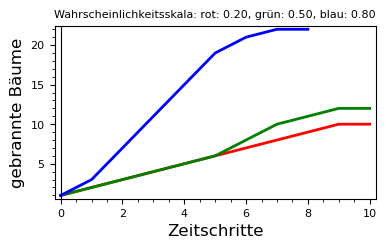

Setup: 2


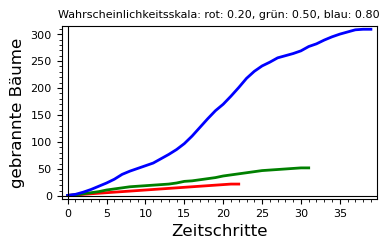

Setup: 3


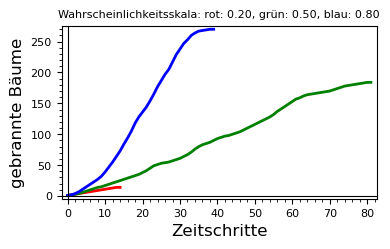

Setup: 4


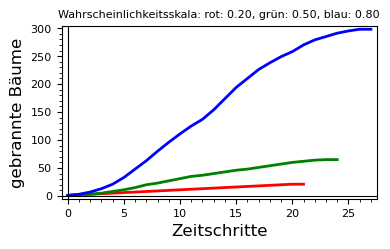

Setup: 5


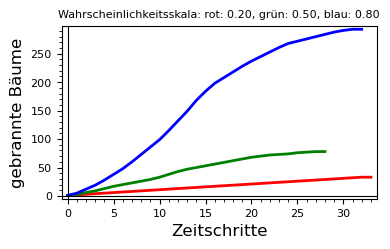

In [711]:
# run analytics

run = 5

while run > 0:
    setupForAnalytics()
    analytics_20 = runAnalytics(0.20, 0, 0, forest_fields.copy(), fire_fields.copy(), free_fields.copy(), copy(forest), number_of_columns, number_of_rows, False, 1)
    analytics_50 = runAnalytics(0.50, 0, 0, forest_fields.copy(), fire_fields.copy(), free_fields.copy(), copy(forest), number_of_columns, number_of_rows, False, 1)
    analytics_80 = runAnalytics(0.80, 0, 0, forest_fields.copy(), fire_fields.copy(), free_fields.copy(), copy(forest), number_of_columns, number_of_rows, False, 1)

    g = Graphics()

    p20 = list_plot(analytics_20, plotjoined=True, title="Wahrscheinlichkeitsskala: rot: 0.20, grün: 0.50, blau: 0.80", frame=True, axes_labels=["Zeitschritte","gebrannte Bäume"], fontsize=8, color='red', thickness=2)
    p50 = list_plot(analytics_50, plotjoined=True, title="Wahrscheinlichkeitsskala: rot: 0.20, grün: 0.50, blau: 0.80", frame=True, axes_labels=["Zeitschritte","gebrannte Bäume"], fontsize=8, color='green', thickness=2)
    p80 = list_plot(analytics_80, plotjoined=True, title="Wahrscheinlichkeitsskala: rot: 0.20, grün: 0.50, blau: 0.80", frame=True, axes_labels=["Zeitschritte","gebrannte Bäume"], fontsize=8, color='blue', thickness=2)
        
    g = g + p20 + p50 + p80
    
    print('Setup: ' + str(6 - run))
    
    g.show(figsize=4)
    
    run -= 1


In diesem Codeabschnitt wird dargestellt, wie sich der Anteil des abgebrannten Waldes in Bezug zur gewählten Wahrscheinlichkeit am Zeitpunkt 10 entwickelt hat.

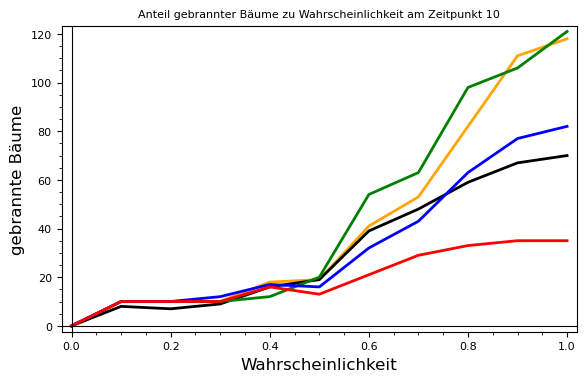

In [712]:
run = 5
g = Graphics()

colors = ['red', 'blue', 'green', 'black', 'orange']

while run > 0:

    setupForAnalytics()

    amount_to_pe = [(0,0)]

    for i in range(1, 11):
        pe = i / 10
        analytics = runAnalytics(pe, 0, 0, forest_fields.copy(), fire_fields.copy(), free_fields.copy(), copy(forest), number_of_columns, number_of_rows, False, 1)

        if(len(analytics) < 10):
            amount_to_pe.append((pe, analytics[len(analytics)-1][1]))
        else:
            amount_to_pe.append((pe, analytics[9][1]))


    plot = list_plot(amount_to_pe, plotjoined=True, title="Anteil gebrannter Bäume zu Wahrscheinlichkeit am Zeitpunkt 10", frame=True, axes_labels=["Wahrscheinlichkeit","gebrannte Bäume"], fontsize=8, color=colors[run - 1], thickness=2)
    g = g + plot
    
    run -= 1

g.show()
    